# 1. Engineering the films dataset

The purpose of this notebook is for the engineering of the films data set into a state that would be ready for analysis. 

## Tasks

1. Load in the MovieLens dataset, merging the `movies.csv` and `links.csv` such that every film has the appropriate `tmdbId` to be used in calling the TMDB API.
2. Request movie details from the TMDB API for all films from the MovieLens dataset. Create a pandas DataFrame from this data and save to a csv.
3. Do some preliminary cleaning on the dataset. These steps include
    * flattening the dictionaries for production companies and spoken languages into string features,
    * converting the release date to a datetime type,
    * dropping all films where either the budget or revenue data is missing, and
    * dropping unnecessary columns.
4. Left join the macroeconomic data to the month of release for the film.
5. Save the complete dataset.

## Factored Code Implementation

### 1. Build the raw `movie_details` dataset from the API

In [1]:
from build_dataset import *
PRODUCTION_DIRECTORY = 'prod-movies'

START TIME =  06:52:01
Loading the MovieLens data ...
Beginning API calls for movie details ...
Approximately 10% complete ...
Approximately 20% complete ...
Approximately 30% complete ...
Approximately 40% complete ...
Approximately 50% complete ...
Approximately 60% complete ...
Approximately 70% complete ...
Approximately 80% complete ...
Approximately 90% complete ...
Completed all API calls for movie details!
COMPLETION TIME =  10:55:39


Time to build data: 4:03:36.499368
Raw dataset saved to prod-movies/raw_movie_details.csv
Raw dataset row count: 58098


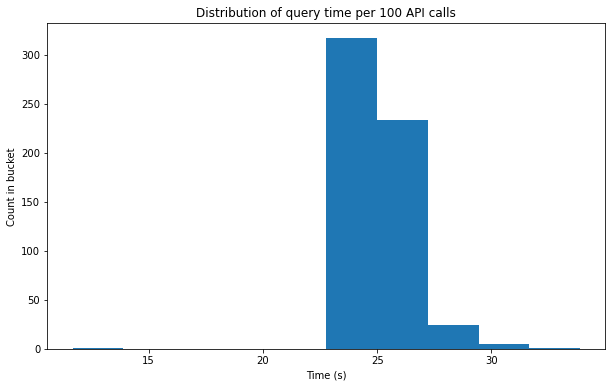

In [2]:
# source is data/ml-latest. On unzipping the MovieLens download, it goes into
# a folder titled ml-latest
# note the below - a full run takes around 4 hours!!
# to test the pipeline, put max_rows to something like 1000
df_raw_movie_details = load_movie_details(config_filepath = 'API.cfg'
                                          , source='data/ml-latest'
                                          , destination=PRODUCTION_DIRECTORY
                                          , batch_size=100
#                                           , max_rows=500
                                          , clean=False
                                          , plot=True
                                         )

### 2. Clean the `movie_details` data to reduce it down to the scope we are concerned with

In [3]:
df_cleaned = clean_movie_details(destination=PRODUCTION_DIRECTORY
                                , source=PRODUCTION_DIRECTORY
                                , print_info=True)

Cleaning the raw movie details DataFrame ...
Finished cleaning the movie details data!
Cleaned dataset row count: 5602
Cleaned dataset saved to prod-movies/movie_details.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5602 entries, 0 to 58085
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             5602 non-null   float64       
 1   id                 5602 non-null   float64       
 2   original_language  5602 non-null   object        
 3   original_title     5602 non-null   object        
 4   popularity         5602 non-null   float64       
 5   release_date       5602 non-null   datetime64[ns]
 6   revenue            5602 non-null   float64       
 7   runtime            5602 non-null   float64       
 8   num_prods          5602 non-null   int64         
 9   prod_comp_names    5602 non-null   object        
 10  prod_comp_cntry    5602 non-null   object        
 1

### 3. Build the raw movie crew dataset from the API

START TIME =  11:10:52
Loading the movie details data ...
Beginning API calls for movie cast and crew ...
Approximately 10% complete ...
Approximately 20% complete ...
Approximately 30% complete ...
Approximately 40% complete ...
Approximately 50% complete ...
Approximately 60% complete ...
Approximately 70% complete ...
Approximately 80% complete ...
Approximately 90% complete ...
Completed all API calls for movie cast and crew!
COMPLETION TIME =  11:32:34


Time to build data: 0:21:38.371854
Raw dataset saved to prod-movies/raw_cast_crew.csv
Raw dataset row count: 5602


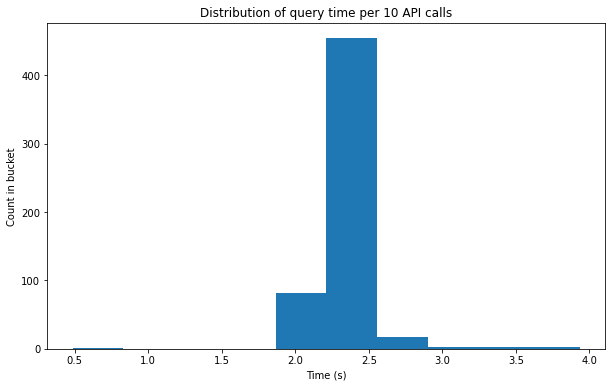

In [4]:
df_cast_crew = load_movie_cast_crew(config_filepath = 'API.cfg'
                                          , source=PRODUCTION_DIRECTORY
                                          , destination=PRODUCTION_DIRECTORY
                                          , batch_size=10
                                          , clean=False
                                          , plot=True
                                     )

### 4. Clean the cast and crew dataset

In [2]:
df_cast_crew = clean_cast_crew(destination=PRODUCTION_DIRECTORY
                               , source=PRODUCTION_DIRECTORY
                               , print_info=True
                              )

Cleaning the raw cast and crew DataFrame ...
Finished cleaning the movie details data!
Cleaned dataset row count: 5602
Cleaned dataset saved to prod-movies/cast_crew.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5602 entries, 0 to 5601
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5602 non-null   int64  
 1   director        5602 non-null   object 
 2   director_pop    5602 non-null   float64
 3   writers         5602 non-null   object 
 4   num_writers     5602 non-null   int64  
 5   avg_writer_pop  5602 non-null   float64
 6   max_writer_pop  5602 non-null   float64
 7   min_writer_pop  5602 non-null   float64
 8   actors          5602 non-null   object 
 9   sum_actor_pop   5602 non-null   float64
 10  avg_actor_pop   5602 non-null   float64
 11  max_actor_pop   5602 non-null   float64
 12  min_actor_pop   5602 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory 

### 5. Join all datasets

These datasets to join are
1. `movie_details.csv`,
2. `cast_crew.csv`, and
3. the macroeconomic data we choose to use.

In [2]:
movies = merge_datasets(source = PRODUCTION_DIRECTORY
                        , destination = PRODUCTION_DIRECTORY
                        , print_info=True)

Merging the movie, cast and crew, and macroeconomic data ...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579 entries, 0 to 5637
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             5579 non-null   float64       
 1   id                 5579 non-null   float64       
 2   original_language  5579 non-null   object        
 3   original_title     5579 non-null   object        
 4   popularity         5579 non-null   float64       
 5   release_date       5579 non-null   datetime64[ns]
 6   revenue            5579 non-null   float64       
 7   runtime            5579 non-null   float64       
 8   num_prods          5579 non-null   int64         
 9   prod_comp_names    5579 non-null   object        
 10  prod_comp_cntry    5579 non-null   object        
 11  language           5579 non-null   object        
 12  num_languages      5579 non-null   int64         
 13  t

In [3]:
print("60's films: {}".format(movies[(movies['release_date']>='1960') & (movies['release_date']<'1970')].shape[0]))
print("70's films: {}".format(movies[(movies['release_date']>='1970') & (movies['release_date']<'1980')].shape[0]))
print("80's films: {}".format(movies[(movies['release_date']>='1980') & (movies['release_date']<'1990')].shape[0]))
print("90's films: {}".format(movies[(movies['release_date']>='1990') & (movies['release_date']<'2000')].shape[0]))
print("00's films: {}".format(movies[(movies['release_date']>='2000') & (movies['release_date']<'2010')].shape[0]))
print("10's films: {}".format(movies[(movies['release_date']>='2010') & (movies['release_date']<'2020')].shape[0]))
print("20's films: {}".format(movies[(movies['release_date']>='2020')].shape[0]))

60's films: 10
70's films: 195
80's films: 528
90's films: 1023
00's films: 1835
10's films: 1987
20's films: 1


## Conclusion of Data Engineering Pipeline notebook

We end with over 5,500 rows in the dataset that may be used for the machine learning model.